# **G.G.: Good Game?** by Matthew Tran 

## March 14, 2022

## **Introduction** 

In the modern age, video games have become a modern past time enjoyed by many people of various ages. A now lucrative industry, video games come in a variety of genres, experiences, and platforms. When asked about successful video games, a handful of titles might come to mind. Ones that are iconic because of their characters, revolutionary because of the way they engage with storytelling, or perhaps nostalgic because of how long they have been around. 

This project seeks to define top performing video games and the traits that may have contributed to the success of these titles. Subsequently, I would like to conduct a more qualitative investigation on these titles, mainly examining reviews to paint a clearer picture of what consumers like about top games. 

## **The Data**

Initial exploration of defining what makes a good game will be conducted using the Video Games CORGIS dataset which can be accessed [here.](https://corgis-edu.github.io/corgis/python/video_games/) This data was originally collected by Dr. Joe Cox who conducted an empirical investigation of U.S. sales data of video games. Dr. Cox concluded that the major factors that predict for a title's ability to attain "blockbuster" status were threefold: the company that produced the title, the console, and the critic reviews. 

I would like to use the data that Dr. Cox collected, which spans thousands of titles that were released between 2004 and 2010, and conduct my own analysis agnostic to his fidnings. 

The categoies that I am interested in and their possible effects on the success of a game are: 
1. Maximum number of players: how many people can play this game at one time? 
2. Online Features: does the game support online play? 
3. Genre: what genre does this game belong to? 

Within these categories, I would like to measure success of a game using: 
1. Review score: the typical review score out of 100 
2. Sales: the total sales made on the game measured in millions of dollars 
3. Completionist: players reported completing everything in the game 



## **Data Exploration**

In [1]:
#hide
import pandas as pd 
import seaborn as sns

In [2]:
#hide
import video_games

In [3]:
#hide
video_game = video_games.get_video_game()

In [4]:
#hide
df = pd.read_csv('video_games.csv')

In [5]:
#hide-input
df.head()

,Title,Features.Handheld?,Features.Max Players,Features.Multiplatform?,Features.Online?,Metadata.Genres,Metadata.Licensed?,Metadata.Publishers,Metadata.Sequel?,Metrics.Review Score,...,Length.Main + Extras.Average,Length.Main + Extras.Leisure,Length.Main + Extras.Median,Length.Main + Extras.Polled,Length.Main + Extras.Rushed,Length.Main Story.Average,Length.Main Story.Leisure,Length.Main Story.Median,Length.Main Story.Polled,Length.Main Story.Rushed
0,Super Mario 64 DS,True,1,True,True,Action,True,Nintendo,True,85,...,24.916667,29.966667,25.000000,16,18.333333,14.333333,18.316667,14.500000,21,9.700000
1,Lumines: Puzzle Fusion,True,1,True,True,Strategy,True,Ubisoft,True,89,...,9.750000,9.866667,9.750000,2,9.616667,10.333333,11.083333,10.000000,3,9.583333
2,WarioWare Touched!,True,2,True,True,"Action,Racing / Driving,Sports",True,Nintendo,True,81,...,3.850000,5.666667,3.333333,11,2.783333,1.916667,2.933333,1.833333,30,1.433333
3,Hot Shots Golf: Open Tee,True,1,True,True,Sports,True,Sony,True,81,...,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0,0.000000
4,Spider-Man 2,True,1,True,True,Action,True,Activision,True,61,...,12.766667,17.316667,12.500000,12,10.483333,8.350000,11.083333,8.000000,23,5.333333


### 1. What are the top games by critic reviews? 

In [6]:
#hide-input
df[['Title','Metrics.Review Score']].sort_values('Metrics.Review Score', ascending = False )

,Title,Metrics.Review Score
837,Grand Theft Auto IV,98
834,Grand Theft Auto IV,98
422,Super Mario Galaxy,97
444,BioShock,96
462,The Orange Box,96
...,...,...
645,Looney Tunes: Acme Arsenal,27
604,Chicken Shoot,27
446,Game Party,25
459,Deal or No Deal,20


### 2. What are the top games by sales? 

In [7]:
#hide-input
df[['Title', 'Metrics.Sales']].sort_values('Metrics.Sales', ascending = False) 

,Title,Metrics.Sales
156,Wii Play,14.66
833,Mario Kart Wii,12.39
157,New Super Mario Bros.,10.03
22,Mario Kart DS,9.99
23,Nintendogs,9.72
...,...,...
826,Sea Monsters: A Prehistoric Adventure,0.01
825,Nervous Brickdown,0.01
824,Lost in Blue 2,0.01
153,Electroplankton,0.01


### 3. What games have the most number of people who report completing the game? 
    * will be skewed based on how many people played the game 

In [8]:
#hide-input
df[['Title', 'Length.Completionists.Polled']].sort_values ('Length.Completionists.Polled', ascending = False) 

,Title,Length.Completionists.Polled
442,Mass Effect,379
444,BioShock,214
922,BioShock,214
845,Fallout 3,146
862,Fallout 3,146
...,...,...
791,Heatseeker,0
789,Fantastic Four: Rise of the Silver Surfer,0
788,Bubble Bobble Double Shot,0
787,Brothers in Arms DS,0


### 4. What genre of game was popular on the market during this time period (2004-2010)? 

In [9]:
#collapse-output
df['Metadata.Genres'].value_counts()

Action                                                  476
Sports                                                  166
Strategy                                                 62
Action,Role-Playing (RPG)                                55
Racing / Driving                                         53
Role-Playing (RPG)                                       52
Action,Strategy                                          45
Action,Racing / Driving                                  40
Simulation                                               30
Action,Simulation                                        28
Action,Adventure                                         28
Adventure                                                21
Role-Playing (RPG),Strategy                              20
Action,Sports                                            20
Racing / Driving,Sports                                  19
Simulation,Strategy                                      12
Racing / Driving,Simulation,Sports      

### I would like to take the "top games" from questions 1-3 and get a closer look at these titles, since they are considered "top performing" in their respective categories. 

In [10]:
#collapse-output
df.iloc[837]

Title                                Grand Theft Auto IV
Features.Handheld?                                  True
Features.Max Players                                   1
Features.Multiplatform?                             True
Features.Online?                                    True
Metadata.Genres                  Action,Racing / Driving
Metadata.Licensed?                                  True
Metadata.Publishers                             Rockstar
Metadata.Sequel?                                    True
Metrics.Review Score                                  98
Metrics.Sales                                       3.91
Metrics.Used Price                                 24.95
Release.Console                            PlayStation 3
Release.Rating                                         E
Release.Re-release?                                 True
Release.Year                                        2008
Length.All PlayStyles.Average                  38.883333
Length.All PlayStyles.Leisure  

In [11]:
#collapse-output
df.iloc[156]

Title                                 Wii Play
Features.Handheld?                        True
Features.Max Players                         2
Features.Multiplatform?                   True
Features.Online?                          True
Metadata.Genres                  Action,Sports
Metadata.Licensed?                        True
Metadata.Publishers                   Nintendo
Metadata.Sequel?                          True
Metrics.Review Score                        58
Metrics.Sales                            14.66
Metrics.Used Price                       14.95
Release.Console                   Nintendo Wii
Release.Rating                               T
Release.Re-release?                       True
Release.Year                              2006
Length.All PlayStyles.Average         5.816667
Length.All PlayStyles.Leisure             8.45
Length.All PlayStyles.Median               4.0
Length.All PlayStyles.Polled                11
Length.All PlayStyles.Rushed          3.316667
Length.Comple

In [12]:
#collapse-output
df.iloc[442]

Title                                          Mass Effect
Features.Handheld?                                    True
Features.Max Players                                     1
Features.Multiplatform?                               True
Features.Online?                                      True
Metadata.Genres                  Action,Role-Playing (RPG)
Metadata.Licensed?                                    True
Metadata.Publishers                              Microsoft
Metadata.Sequel?                                      True
Metrics.Review Score                                    91
Metrics.Sales                                         1.57
Metrics.Used Price                                   17.95
Release.Console                                       X360
Release.Rating                                           T
Release.Re-release?                                   True
Release.Year                                          2007
Length.All PlayStyles.Average                    28.0666

In [13]:
#hide-input
df.iloc[[837,156,442]]

,Title,Features.Handheld?,Features.Max Players,Features.Multiplatform?,Features.Online?,Metadata.Genres,Metadata.Licensed?,Metadata.Publishers,Metadata.Sequel?,Metrics.Review Score,...,Length.Main + Extras.Average,Length.Main + Extras.Leisure,Length.Main + Extras.Median,Length.Main + Extras.Polled,Length.Main + Extras.Rushed,Length.Main Story.Average,Length.Main Story.Leisure,Length.Main Story.Median,Length.Main Story.Polled,Length.Main Story.Rushed
837,Grand Theft Auto IV,True,1,True,True,"Action,Racing / Driving",True,Rockstar,True,98,...,41.866667,71.966667,40.000000,350,28.466667,28.250000,46.883333,28.0,401,18.050000
156,Wii Play,True,2,True,True,"Action,Sports",True,Nintendo,True,58,...,10.466667,11.466667,11.416667,3,9.466667,4.083333,5.016667,4.0,8,2.883333
442,Mass Effect,True,1,True,True,"Action,Role-Playing (RPG)",True,Microsoft,True,91,...,29.733333,60.933333,28.000000,1100,18.766667,17.383333,69.966667,16.5,769,11.533333


Observed similarities and differences: 
   1. Action as one of the genres, though none fall exclusively into action only. 
   2. All 3 were a sequel of some kind, and based off of a previously licensed entity. 
   3. Max players do not go above 2, two of the three games are only single-player. 
   4. All games came from different publishers. 
   5. All released for different consoles. 

Because I am interested in the intersection of video games and pedagogy, I wanted to see the games that were considered "Educational." 
   * These were only the titles exclusively listed as 'Educational' as the genre

In [14]:
#hide-input
df[df['Metadata.Genres'] == 'Educational']

,Title,Features.Handheld?,Features.Max Players,Features.Multiplatform?,Features.Online?,Metadata.Genres,Metadata.Licensed?,Metadata.Publishers,Metadata.Sequel?,Metrics.Review Score,...,Length.Main + Extras.Average,Length.Main + Extras.Leisure,Length.Main + Extras.Median,Length.Main + Extras.Polled,Length.Main + Extras.Rushed,Length.Main Story.Average,Length.Main Story.Leisure,Length.Main Story.Median,Length.Main Story.Polled,Length.Main Story.Rushed
549,My Word Coach,True,1,True,True,Educational,True,Ubisoft,True,71,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0
1000,MX vs. ATV Untamed,True,1,True,True,Educational,True,Ubisoft,True,59,...,0.0,0.0,0.0,0,0.0,12.0,12.0,12.0,1,12.0


In [15]:
#collapse-output
df.iloc[549]

Title                            My Word Coach
Features.Handheld?                        True
Features.Max Players                         1
Features.Multiplatform?                   True
Features.Online?                          True
Metadata.Genres                    Educational
Metadata.Licensed?                        True
Metadata.Publishers                    Ubisoft
Metadata.Sequel?                          True
Metrics.Review Score                        71
Metrics.Sales                             0.37
Metrics.Used Price                       15.95
Release.Console                    Nintendo DS
Release.Rating                               T
Release.Re-release?                       True
Release.Year                              2007
Length.All PlayStyles.Average              0.0
Length.All PlayStyles.Leisure              0.0
Length.All PlayStyles.Median               0.0
Length.All PlayStyles.Polled                 0
Length.All PlayStyles.Rushed               0.0
Length.Comple

In [16]:
#collapse-output
df.iloc[1000]

Title                            MX vs. ATV Untamed
Features.Handheld?                             True
Features.Max Players                              1
Features.Multiplatform?                        True
Features.Online?                               True
Metadata.Genres                         Educational
Metadata.Licensed?                             True
Metadata.Publishers                         Ubisoft
Metadata.Sequel?                               True
Metrics.Review Score                             59
Metrics.Sales                                  0.27
Metrics.Used Price                            16.95
Release.Console                            Sony PSP
Release.Rating                                    T
Release.Re-release?                            True
Release.Year                                   2008
Length.All PlayStyles.Average                  12.0
Length.All PlayStyles.Leisure                  12.0
Length.All PlayStyles.Median                   12.0
Length.All P

Takeaways from initial data exploration: 
1. Because of the saturation of Action games, I would like to take a closer look at the metrics for success in that specific genre, as well as the other genres that are well-represented in the market. 
2. Because the games that were successful in these categories were all sequels of some kind, I think it would be interested to investigate if there are any titles that were successful without being a sequel, which would speak to the degree to which a factor like nostalgia or investment in a story/ universe contribute to a title's success. 
3. Because these three games did not have a max player capacity above 2, are there any titles that support multiplayer that are also finding success? 
4. Are there certain publishers or consoles that are finding more general success with their titles than others? 

## **Further Exploration** 

Based on the preliminary findings from my first data exploration, I would like to take a closer look at the data in certain places. 

### Defining Success 
Using the metrics I established previously, I would like to examine the top-performing games in the categories of critic reviews, sales, and number of completionists. 

### 1. Critic Reviews 

In [17]:
#hide
df_reviews = df[['Title','Metrics.Review Score']]

In [18]:
#hide
df_reviews_top = df_reviews[df_reviews['Metrics.Review Score'] > 90].sort_values('Metrics.Review Score', ascending = False)

In [19]:
#hide
df_reviews_top.index

Int64Index([837, 834, 422, 462, 444, 844, 161, 165, 420, 421, 430, 922, 840,
            160, 835, 838, 453, 845, 865, 851, 927, 464, 436, 435, 452, 442,
            861, 874,  22],
           dtype='int64')

In [20]:
#hide
df2 = df.iloc[df_reviews_top.index]

<AxesSubplot:xlabel='Metrics.Review Score', ylabel='Metrics.Sales'>

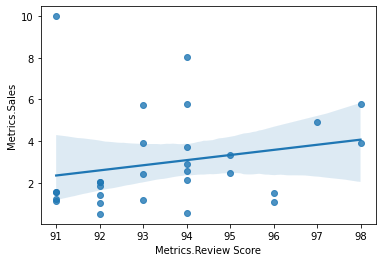

In [21]:
#hide-input
sns.regplot(x = df2['Metrics.Review Score'], y = df2['Metrics.Sales'])

Here, a sucessful game by critic review was defined as having a critic review score of over 90, of which there were 29 games. It does not seem to be the case, however, that a high critic score correlates very strongly to commercial success in sales. In fact, the games that received the highest critic scores were not the ones which had the most number of sales, with a handfull of games receiving more commercial sucess, and the highest seller (in this group) having the lowest critics score... 

<AxesSubplot:xlabel='Metrics.Review Score', ylabel='Length.Completionists.Polled'>

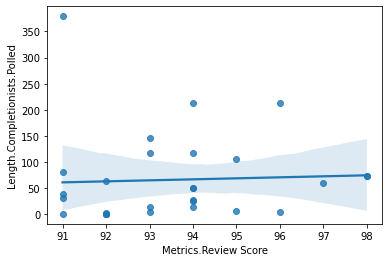

In [22]:
#hide-input
sns.regplot(x = df2['Metrics.Review Score'], y = df2['Length.Completionists.Polled'])

I observed an even weaker relationship between critic review scores and number of completionists in for the games. 
 
This could however be because the games which received the highest critic review scores, such as Grand Theft Auto IV, are known for being "open-world" games in which the player can freely navigate the world without the story being a main part of interacting with the game. 

In [23]:
#collapse-output
df2[['Title', 'Metrics.Review Score', 'Metrics.Sales', 'Length.Completionists.Polled', 'Metadata.Genres']].sort_values('Metrics.Sales', ascending = False)

,Title,Metrics.Review Score,Metrics.Sales,Length.Completionists.Polled,Metadata.Genres
22,Mario Kart DS,91,9.99,32,Racing / Driving
420,Halo 3,94,8.03,27,Action
421,Call of Duty 4: Modern Warfare,94,5.77,50,Action
834,Grand Theft Auto IV,98,5.76,73,"Action,Racing / Driving"
835,Super Smash Bros.: Brawl,93,5.71,15,Action
422,Super Mario Galaxy,97,4.94,61,Action
837,Grand Theft Auto IV,98,3.91,73,"Action,Racing / Driving"
838,Gears of War 2,93,3.90,5,Action
160,Gears of War,94,3.70,15,Action
161,The Legend of Zelda: Twilight Princess,95,3.33,106,"Action,Role-Playing (RPG)"


Notably, 27 out of the 29 titles that were considered top-performers as described by their critic review scores had Action as one of their genre descriptors. The two games that did not belong to this genre were considered as Role-Playing and Racing/ Driving games. 

### 2. Commercial Sales 

In [24]:
#hide
df_sales = df[['Title', 'Metrics.Sales']]

In [50]:
#hide
df['Metrics.Sales'].mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0       4.69
1       0.56
2       0.54
3       0.49
4       0.45
        ... 
1207    0.03
1208    0.03
1209    0.03
1210    0.02
1211    0.02
Name: Metrics.Sales, Length: 1212, dtype: float64>

In [26]:
#hide
df_sales_top = df_sales[df_sales['Metrics.Sales'] > 4.69]

In [27]:
#hide
len(df_sales_top.index)

14

In [28]:
#hide
df3 = df.iloc[df_sales_top.index]

<AxesSubplot:xlabel='Metrics.Sales', ylabel='Metrics.Review Score'>

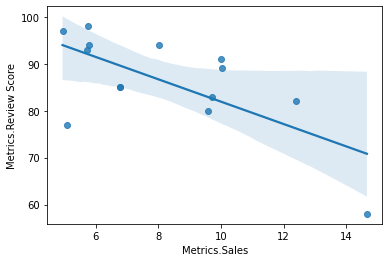

In [29]:
#hide-input
sns.regplot(x = df3['Metrics.Sales'], y =df3['Metrics.Review Score'] )

Very interestingly, for the top-performing games in terms if sales, being 14 games, there was actually a negative correlation between sales and critic scores. Shockingly, the game with the most sales had the lowest (sub-60) score of the group of games! However, the games with the highest critic scores in this set still had sales that were above the mean of the entire set, so these games were by no means unsuccessful. 

<AxesSubplot:xlabel='Metrics.Sales', ylabel='Length.Completionists.Polled'>

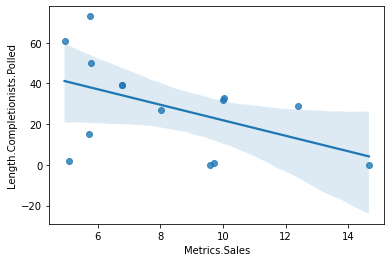

In [65]:
#hide-input
sns.regplot(x = df3['Metrics.Sales'], y =df3['Length.Completionists.Polled'])

A similar negative relationship was observed between sales and number of completionist players. For similar reasons as the to critic scores grouping, the top game, Wii Play, is not a game that is well-known for having a definitive plot that players follow, but rather is a game that is often played socially with family and friends.  

In [31]:
#hide-input
df3[['Title', 'Metrics.Review Score', 'Metrics.Sales', 'Length.Completionists.Polled', 'Metadata.Genres']].sort_values('Metrics.Sales', ascending = False)

,Title,Metrics.Review Score,Metrics.Sales,Length.Completionists.Polled,Metadata.Genres
156,Wii Play,58,14.66,0,"Action,Sports"
833,Mario Kart Wii,82,12.39,29,Racing / Driving
157,New Super Mario Bros.,89,10.03,33,Action
22,Mario Kart DS,91,9.99,32,Racing / Driving
23,Nintendogs,83,9.72,1,Simulation
419,Wii Fit,80,9.60,0,"Educational,Sports"
420,Halo 3,94,8.03,27,Action
158,Pokmon Diamond,85,6.77,39,Role-Playing (RPG)
159,Pokmon Pearl,85,6.77,39,Role-Playing (RPG)
421,Call of Duty 4: Modern Warfare,94,5.77,50,Action


The distribution of genres in this group were slightly more diverse than that of the critic scores group. While Action games still held a slight majority at 8 out 14 games being part of the Action genre, Role-Playing, sports, and Driving games made up the remainder of this group. 

### 3. Completionists (or not?) 

Following my analysis of the top-performing games under critic scores and commercial sales, I have decided not to continue with using number of completionists as a measure of success for a variety of reasons. Firstly, this number would already be skewed because of how the number of players would affect this figure, and completionist data as such would require standardization. While the additional work of standardizing this data is not very much work, I also chose not to use number of completionists in the remainder of my analysis because of how easily this number could be affected by the type of game. There are many games that are made simply to be enjoyed, and do not have the aspect of following a story or plot that other games have. In the former case, players would not be as motivated to "complete" the game, which would skew how the number of com

### Action Games and Reviews? 

Because of the overrepresentation of Action games in the games with high critic reviews, I wanted to explore the idea that critics tend to favor games that are of the Action genre. 

In [32]:
#hide
df_action = df[df['Metadata.Genres'] == 'Action'] 

In [56]:
#collapse-output
df_action['Metrics.Review Score'].mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0       85
4       61
13      74
17      74
18      72
        ..
1197    42
1200    30
1204    58
1205    70
1211    39
Name: Metrics.Review Score, Length: 476, dtype: int64>

In [34]:
#hide
df_sports =  df[df['Metadata.Genres'] == 'Sports'] 

In [55]:
#collapse-output
df_sports['Metrics.Review Score'].mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 3       81
8       68
40      75
47      74
51      83
        ..
1143    63
1163    63
1167    65
1170    80
1199    68
Name: Metrics.Review Score, Length: 166, dtype: int64>

In [36]:
#hide
df_strategy =  df[df['Metadata.Genres'] == 'Strategy'] 

In [54]:
#collapse-output
df_strategy['Metrics.Review Score'].mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 1       89
7       75
15      73
48      83
70      90
        ..
1159    71
1177    78
1190    63
1198    74
1202    56
Name: Metrics.Review Score, Length: 62, dtype: int64>

Looking at the 3 most common genres and examining the mean critic review scores, it seems that there does not seem to be an inherent bias for Action games amonst critics, since strategy games had a higher mean score, though I think this is one area of analysis that could benefit from more investigation. 

## **Who's at the Top?**

From both my own personal perspective, as well as how I assume businesses and consumers would define success, I think commerical sales is the best way to mesure the success of a game. However, because I think critic reviews may encapsulate some measure of the quality of a game, I think it would be beneficial to include critics reviews as a measure of success in some way. Therefore, I decided that when choosing the "top games," I would choose those games that were present in both categories or top-performers in critic scores and sales. That is, games that received both above a 90 on critic scores and had sales above 4.69. 

To account for any phenomenon that goes beyond any conventional measure of success I would like to include those titles that had extremely high sales, but perhaps were not deemed a "good game" by critics. These three games would be: Wii Play, Mario Kart Wii, and New Super Mario Bros, all titles that had commericial sales greater that 10 million dollars. 

In [38]:
#hide
top_reviews = df2['Title'].tolist()
top_sales = df3['Title'].tolist()

In [39]:
#collapse-output
top_sales

['Mario Kart DS',
 'Nintendogs',
 'Brain Age: Train Your Brain in Minutes a Day!',
 'Wii Play',
 'New Super Mario Bros.',
 'Pokmon Diamond',
 'Pokmon Pearl',
 'Wii Fit',
 'Halo 3',
 'Call of Duty 4: Modern Warfare',
 'Super Mario Galaxy',
 'Mario Kart Wii',
 'Grand Theft Auto IV',
 'Super Smash Bros.: Brawl']

In [40]:
#collapse-output
top_reviews

['Grand Theft Auto IV',
 'Grand Theft Auto IV',
 'Super Mario Galaxy',
 'The Orange Box',
 'BioShock',
 'LittleBigPlanet',
 'The Legend of Zelda: Twilight Princess',
 'The Elder Scrolls IV: Oblivion',
 'Halo 3',
 'Call of Duty 4: Modern Warfare',
 'Call of Duty 4: Modern Warfare',
 'BioShock',
 'Metal Gear Solid 4: Guns of the Patriots',
 'Gears of War',
 'Super Smash Bros.: Brawl',
 'Gears of War 2',
 'The Elder Scrolls IV: Oblivion',
 'Fallout 3',
 'Rock Band',
 'Rock Band 2',
 'Chrono Trigger',
 'Rock Band',
 'Rock Band',
 'Guitar Hero II',
 'Resident Evil 4',
 'Mass Effect',
 'God of War: Chains of Olympus',
 'Rock Band 2',
 'Mario Kart DS']

In [41]:
#collapse-output
print(set(top_sales).intersection(set(top_reviews)))

{'Mario Kart DS', 'Call of Duty 4: Modern Warfare', 'Super Mario Galaxy', 'Super Smash Bros.: Brawl', 'Halo 3', 'Grand Theft Auto IV'}


In [42]:
#hide
top_games = set(top_sales).intersection(set(top_reviews))

In [43]:
#hide
top_games_dict = {'Grand Theft Auto IV' : 837, 
             'Mario Kart DS' : 22, 
             'Halo 3' : 420, 
             'Call of Duty 4: Modern Warfare' : 421, 
             'Super Mario Galaxy' : 422, 
             'Super Smash Bros.: Brawl' : 835
}

In [44]:
#hide
target_indices = [837, 22, 420, 421, 422, 835, 156, 833, 157]
top_games = df.iloc[target_indices]

In [45]:
#hide
top_games = top_games[['Title', 'Metrics.Review Score', 'Metrics.Sales', 'Metadata.Genres', 'Metadata.Sequel?', 'Metadata.Publishers', 'Features.Max Players', 'Release.Console', 'Release.Year']]

In [46]:
#hide-input
top_games.sort_values('Metrics.Sales', ascending = False)

,Title,Metrics.Review Score,Metrics.Sales,Metadata.Genres,Metadata.Sequel?,Metadata.Publishers,Features.Max Players,Release.Console,Release.Year
156,Wii Play,58,14.66,"Action,Sports",True,Nintendo,2,Nintendo Wii,2006
833,Mario Kart Wii,82,12.39,Racing / Driving,True,Nintendo,4,Nintendo Wii,2008
157,New Super Mario Bros.,89,10.03,Action,True,Nintendo,1,Nintendo DS,2006
22,Mario Kart DS,91,9.99,Racing / Driving,True,Nintendo,1,Nintendo DS,2005
420,Halo 3,94,8.03,Action,True,Microsoft,4,X360,2007
421,Call of Duty 4: Modern Warfare,94,5.77,Action,True,Activision,4,X360,2007
835,Super Smash Bros.: Brawl,93,5.71,Action,True,Nintendo,6,Nintendo Wii,2008
422,Super Mario Galaxy,97,4.94,Action,True,Nintendo,2,Nintendo Wii,2007
837,Grand Theft Auto IV,98,3.91,"Action,Racing / Driving",True,Rockstar,1,PlayStation 3,2008


<AxesSubplot:xlabel='Metadata.Genres', ylabel='count'>

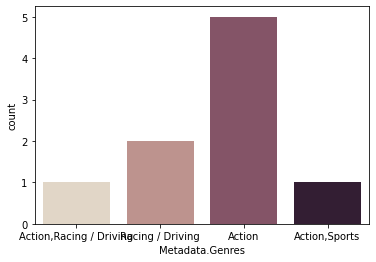

In [63]:
#hide-input
sns.countplot(x = top_games['Metadata.Genres'], palette = 'ch:.25')

<AxesSubplot:xlabel='Metadata.Publishers', ylabel='count'>

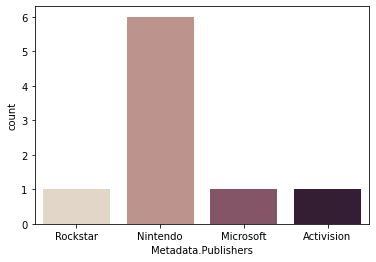

In [66]:
#hide-input
sns.countplot(x = top_games['Metadata.Publishers'], palette = 'ch:.25')

<AxesSubplot:xlabel='Features.Max Players', ylabel='count'>

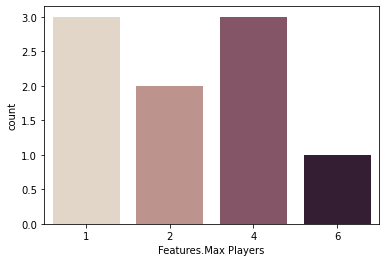

In [67]:
#hide-input
sns.countplot(x = top_games['Features.Max Players'], palette = 'ch:.25')

<AxesSubplot:xlabel='Release.Console', ylabel='count'>

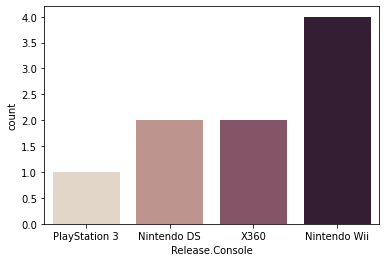

In [68]:
#hide-input
sns.countplot(x = top_games['Release.Console'], palette = 'ch:.25')

## **Discussion**

Examining the commonalities among the top performing games, it is clear that Nintendo games have the highest sales. They make up 6 of the 9 games that I identified as top-performing games, and represent the 6 highest-earning games in the entire dataset. This seems to operate independently of critic reviews, as the three highest selling games did not receive scores above 90 from critics. 

I think that there are factors, especially metadata about each game beyond the scope of information that was included in this dataset, that contributes to why games from Nintendo, and especially those that came out at the top of this dataset were considered top-performers by sales. 

Three of the top four games- Wii Play, Mario Kart Wii, and Mario Kart DS- are titles that do not have a strong storyline for the player to follow. Rather, they are multiplayer games that are centered around gaming as a social aspect. With family or friends, players can compete on teams with or against each other. Because you are constantly playing with real people in a competitive environment, the gaming experience is kept dynamic and engaging, rather then relying on a progressing in a story line. 

When considering what kinds of games are successful in the market, it may be helpful to consider whether a game is player-versus-player (PVP) or player-vs-everyone (PVE). Wii Play, Mario Kart Wii, and Mario Kart DS, are examples of PVP games, that is, players do not play by the themselves against computers, but rather against other real players, and these kinds of games inherently carry with them a competitive aspect. In terms of motivation, players are motivated to constantly return to the game in order to hone their skills in the game. In many PVE games, players are instead motivated by the desire to progress in the game itself. 

The other game that was represented in the top-performing game, despite not having the same PVP quality as the others, was New Super Mario Bros. I think the reason that this title in particular was so successful is because of its recognisability. Just the name Mario in the gaming sphere is already enough for people, gamer or not, to have a mental image of what the game will entail. As a game that has had many remakes and interations, I think that this game's successful largely comes from its capacity to combine the nostalgia of players with the refreshing nature of a game remake or sequel. A game beloved by many, the Super Mario series of games is one that people are invested in because of their emotional attatchment to the games and characters. 

When it comes to learning, motivation is a crucial part of pedagogy. In both the conventional sense and in the realm of possibly gamifying learning, I think that it would be helpful to incoroporate a healthy amount of competition, whether it be against the self or against others. I think it is also important for students to have the ability to engage with other students as well, as this social aspect to learning and gaming is something that motivates students additionally. 

## **Nintendo: A Closer Look** 

Looking at the top-performing games, it is clear to see that Nintendo has a clear group on the gaming market when it comes to sales. As such, I would like to examine just what about these games makes them so desirable to players, and as such I would like to look to Nintendo themselves to see how they would market and describe these games. 

In [5]:
#hide
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import matplotlib.pyplot as plt

In [8]:
#hide
myStopWords = list(punctuation) + stopwords.words('english')

In [4]:
#hide
super_mario_describe = '''
Bowser has taken over the Mushroom Kingdom, and it's up to Mario to put an end to his sinister reign! Battle Bowser's vile henchmen through 32 levels in the Original 1985 game mode. Move on to collecting special Red Coins and Yoshi Eggs in Challenge mode. Then, try to unlock a secret mode that's waiting to be found by super players like you! Every mode will give you the chance to beat your own score, and there's a lot more to do than just saving a princess. So get ready for a brick-smashin', pipe-warpin', turtle-stompin' good time!
Mario™ and Luigi™ star in their first ever Mushroom Kingdom adventure! Find out why Super Mario Bros. is instantly recognizable to millions of people across the globe, and what made it the best-selling game in the world for three decades straight. Jump over obstacles, grab coins, kick shells, and throw fireballs through eight action-packed worlds in this iconic NES classic. Only you and the Mario Bros. can rescue Princess Toadstool from the clutches of the evil Bowser.
Pick up items and throw them at your adversaries to clear levels in seven fantastical worlds. Even enemies can be picked up and tossed across the screen. Each character has a unique set of abilities: Luigi can jump higher and farther than any of the other characters, Toad can dig extremely fast and pull items out of the ground quicker than anyone, and the princess is the only one who can jump and hover temporarily. This unique installment in the Mario series will keep you coming back for more!
Relive the classic that brought renowned power-ups such as the Tanooki Suit to the world of Super Mario Bros.!
Bowser™ and the Koopalings are causing chaos yet again, but this time they’re going beyond the Mushroom Kingdom into the seven worlds that neighbor it. Now Mario™ and Luigi™ must battle a variety of enemies, including a Koopaling in each unique and distinctive world, on their way to ultimately taking on Bowser himself. Lucky for the brothers, they have more power-ups available than ever before. Fly above the action using the Super Leaf, swim faster by donning the Frog Suit, or defeat enemies using the Hammer Bros. Suit. Use the brand-new overworld map to take the chance to play a minigame in hopes of gaining extra lives or to find a Toad’s House where you can pick up additional items. All this (and more) combines into one of gaming’s most well-known and beloved titles—are you ready to experience gaming bliss?
'''

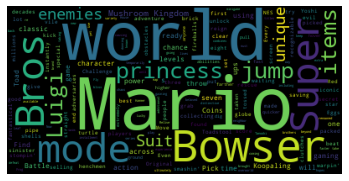

In [24]:
#hide-input
wc = WordCloud().generate_from_text(super_mario_describe)

#Use matplotlib.pyplot to display the fitted wordcloud
#Turn axis off to get rid of axis numbers
plt.imshow(wc)
plt.axis('off')
plt.show()

In [14]:
#hide
mario_kart_describe = '''
Select one of eight characters from the Mario™ series—offering a variety of driving styles—and take on three championship cups in three different kart classes. Win enough, and you'll unlock a fourth circuit: the ultra-tough Special Cup. Crossing the finish line in first place isn't an easy task, though, as each track has unique obstacles to conquer and racers can obtain special power-ups that boost them to victory. With more than 15 tracks to master and nearly endless replay value, Super Mario Kart is classic gaming…with some banana peels thrown in for good measure!
The newest installment of the fan-favorite Mario Kart™ franchise brings Mushroom Kingdom racing fun into glorious 3D. For the first time, drivers explore new competitive kart possibilities, such as soaring through the skies or plunging into the depths of the sea. New courses, strategic new abilities and customizable karts bring the racing excitement to new heights.

FEATURES:

The Mario Kart franchise continues to evolve. New kart abilities add to the wild fun that the games are known for. On big jumps, a kart deploys a wing to let it glide over the track shortcut. When underwater, a propeller pops out to help the kart cruise across the sea floor.
Players can show their own style by customizing their vehicles with accessories that give them a competitive advantage. For instance, giant tires help a kart drive off-road, while smaller tires accelerate quickly on paved courses.
People can choose to race as one of their favorite Mushroom Kingdom characters or even as their Mii™ character.
New courses take players on wild rides over mountains, on city streets and through a dusty desert. Nintendo fans will recognize new courses on Wuhu Island and in the jungles from Donkey Kong Country™ Returns.
The game supports both SpotPass™ and StreetPass™ features.
Players can compete in local wireless matches or online over a broadband Internet connection.

The newest installment of the fan-favorite Mario Kart™ franchise brings Mushroom Kingdom racing fun into glorious 3D. For the first time, drivers explore new competitive kart possibilities, such as soaring through the skies or plunging into the depths of the sea. New courses, strategic new abilities and customizable karts bring the racing excitement to new heights.

FEATURES:

The Mario Kart franchise continues to evolve. New kart abilities add to the wild fun that the games are known for. On big jumps, a kart deploys a wing to let it glide over the track shortcut. When underwater, a propeller pops out to help the kart cruise across the sea floor.
Players can show their own style by customizing their vehicles with accessories that give them a competitive advantage. For instance, giant tires help a kart drive off-road, while smaller tires accelerate quickly on paved courses.
People can choose to race as one of their favorite Mushroom Kingdom characters or even as their Mii™ character.
New courses take players on wild rides over mountains, on city streets and through a dusty desert. Nintendo fans will recognize new courses on Wuhu Island and in the jungles from Donkey Kong Country™ Returns.
The game supports both SpotPass™ and StreetPass™ features.
Players can compete in local wireless matches or online over a broadband Internet connection.
'''

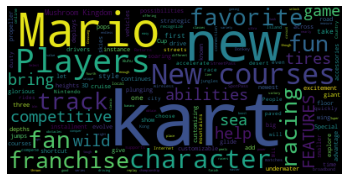

In [25]:
#hide-input
wc2 = WordCloud().generate_from_text(mario_kart_describe)

#Use matplotlib.pyplot to display the fitted wordcloud
#Turn axis off to get rid of axis numbers
plt.imshow(wc2)
plt.axis('off')
plt.show()

In [16]:
#hide
smash_bros_describe = '''
Super Smash Bros. for Nintendo 3DS is the first portable entry in the renowned series, in which game worlds collide. Up to four players battle each other locally or online using some of Nintendo’s most well-known and iconic characters across beautifully designed stages inspired by classic portable Nintendo games. It’s a genuine, massive Super Smash Bros. experience that’s available to play on the go, anytime, anywhere.

FEATURES:

Smash and crash through “Smash Run” mode, a new mode exclusive to the Nintendo 3DS version that gives up to four players five minutes to fight solo through a huge battlefield while taking down recognizable enemies from almost every major Nintendo franchise and multiple third-party partners. Defeated enemies leave behind power-ups to collect. Players who collect more power-ups have an advantage once time runs out and the battle with opponents begins.
Compete with classic characters from the Super Smash Bros. series like Mario, Link, Samus and Pikachu, along with new challengers like Mega Man, Little Mac and newly announced Palutena, the Goddess of Light from the Kid Icarus games. For the first time players can even compete as their own Mii characters.
Customize different aspects of your character when playing locally or online with friends in a variety of multiplayer modes.
View most elements of the high-energy action at silky-smooth 60 frames per second and in eye-popping stereoscopic 3D.
Fight against friends and family locally or online, or battle random challengers all over the world online in “For Fun” or “For Glory” modes.

Gaming icons clash in the ultimate brawl you can play anytime, anywhere! Smash rivals off the stage as new characters Simon Belmont and King K. Rool join Inkling, Ridley, and every fighter in Super Smash Bros. history. Enjoy enhanced speed and combat at new stages based on the Castlevania series, Super Mario Odyssey, and more!

Having trouble choosing a stage? Then select the Stage Morph option to transform one stage into another while battling—a series first! Plus, new echo fighters Dark Samus, Richter Belmont, and Chrom join the battle. Whether you play locally or online, savor the faster combat, new attacks, and new defensive options, like a perfect shield. Jam out to 900 different music compositions and go 1-on-1 with a friend, hold a 4-player free-for-all, kick it up to 8-player battles and more! Feel free to bust out your GameCube controllers—legendary couch competitions await—or play together anytime, anywhere!
'''

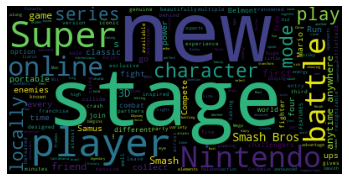

In [26]:
#hide-input
wc3 = WordCloud().generate_from_text(smash_bros_describe)

#Use matplotlib.pyplot to display the fitted wordcloud
#Turn axis off to get rid of axis numbers
plt.imshow(wc3)
plt.axis('off')
plt.show()

### It's Mario's World and We're Just Playing in It 

After creating word clouds from Nintendo's descriptions of its highest selling titles from 2004-2010, there are some recurring themes that we see when Nintendo describes its games to players and potential customers. Words unique to the game, such as "stage," "kart", and "world" are combined with descriptors such as "new," "fun," and "unique," as well as familiar terms such as "Nintendo," "Mario," and "Bowser," to create a sense that the player will be buying into a refreshing, updated, and modernized version of a product that they know and love. I think that much of Nintendo's success in the gaming market comes from the so-called empire that it has created both with its consistency of creating modern versions of its classic titles and capitalizing off of the nostalgia for these titles as well. 

For developers that are not Nintendo, I think that it is important to create characters that people will love, and create a universe around these characters, incorporating them into different games and genres. While Mario is one character that definitely become a poster-child for Nintendo, I think that other characters such as Link and Zelda, or the Pokemon franchise in general have also achieved a similar status of recognizability for the company, and would likely be top-performing games in a more modern dataset. 

## **Conclusion** 

Through conducting this analysis of the video games dataset from CORGIS, I was able to learn a lot about the market in general, and what makes a "successful" game. My findings constrasted my expectations, but I was able to come to conclusions that I believe would be helpful for both game developers, and my own interests in gamifying learning. 

In my exploration of both this project, and the course Digital Humanities 140, I learned many Python tools and became more comfortable working with new libraries as well as datasets. Although I used pandas for the majority of my analysis, the two libraries that I found helpful as well were seaborn and wordcloud for data visualization. Seaborn allowed me to combine aesthetic graphical information with statistical information, and wordcloud allowed me to create easy-to-understand visualizations, both of which reminded me of the importance of being able to tell a story with your data. 

In the future, it would be fascinating to conduct a similar study with the modern video game market. Nowadays, gaming has been expanded to PC and mobile platforms, which were not represented in the CORGIS dataset. Additionally, many games are now free-to-play, so I think the metrics that are used for success may be a bit different that they were in my investigation. With the rise of e-sports and streaming, gaming is consumed in ways outside of simply playing the game, and has become a form of entertainment that is similar to movies, sporting, and YouTube. 

I would like to acknowledge Professor Winjum for his dedication to instruction this quarter, and his continual understanding. Thank you! 